# Boston housing dataset
MEDV prediction with sklearn linear regression solver 

## Columns

In [ ]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population


# MEDV: Median value of owner-occupied homes in $1000s <---- predicted

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [29]:
boston.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


Попытаемся предсказать величину MEDV.

In [30]:
boston['MEDV'] = boston_dataset.target

In [33]:
boston.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [35]:
X = boston.iloc[:, 0:13].values
y = boston.iloc[:, 13].values.reshape(-1,1)

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [38]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


In [43]:
corr_matrix=boston.corr();

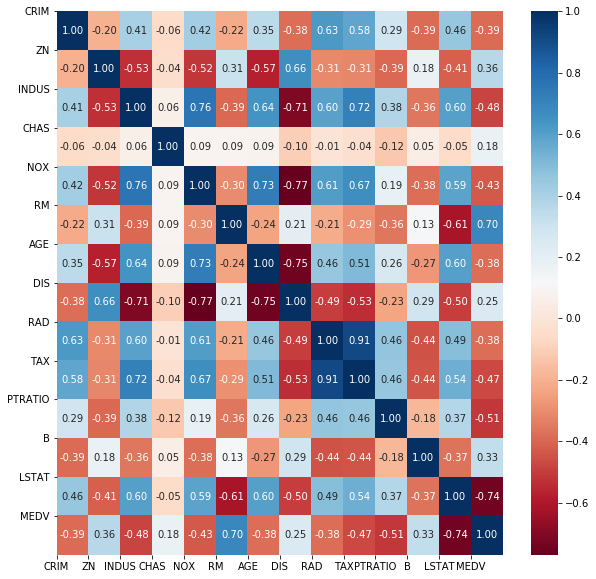

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.show()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6984854476156042
R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710366
RMSE:  4.6472797457242


Для LinearRegression из sklear получили $R_{test}^2$ = 0.7133593313710366

In [ ]:
plt.subplots(figsize=(20,15))
# sns.heatmap(cov_matrix, annot=True, fmt='g')
sns.heatmap(corr_matrix)
plt.show()

In [18]:
train=boston.sample(frac=0.2,random_state=200)
train = train.T

In [19]:
corr_matrix = train.corr()
cov_matrix = np.cov(train,bias=True)

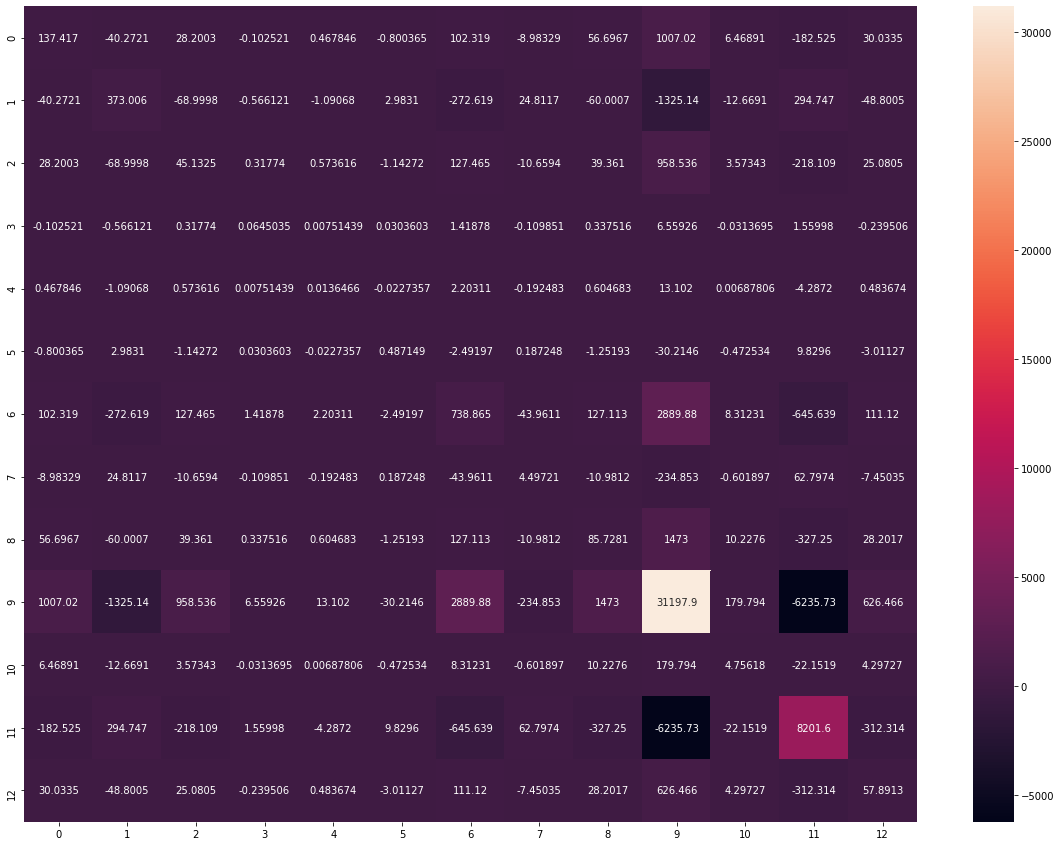

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap(cov_matrix, annot=True, fmt='g')
# sns.heatmap(cov_matrix)
plt.show()

,207,13,22,369,444,88,325,477,221,384,...,11,405,12,92,275,164,471,322,371,28
CRIM,0.25199,0.62976,1.23247,5.66998,12.8023,0.0566,0.19186,15.0234,0.40771,20.0849,...,0.11747,67.9208,0.09378,0.04203,0.09604,2.24236,4.03841,0.35114,9.2323,0.77299
ZN,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.0000,0.00000,0.0000,...,12.50000,0.0000,12.50000,28.00000,40.00000,0.00000,0.00000,0.00000,0.0000,0.00000
INDUS,10.59000,8.14000,8.14000,18.10000,18.1000,3.4100,7.38000,18.1000,6.20000,18.1000,...,7.87000,18.1000,7.87000,15.04000,6.41000,19.58000,18.10000,7.38000,18.1000,8.14000
CHAS,0.00000,0.00000,0.00000,1.00000,0.0000,0.0000,0.00000,0.0000,1.00000,0.0000,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000
NOX,0.48900,0.53800,0.53800,0.63100,0.7400,0.4890,0.49300,0.6140,0.50700,0.7000,...,0.52400,0.6930,0.52400,0.46400,0.44700,0.60500,0.53200,0.49300,0.6310,0.53800
RM,5.78300,5.94900,6.14200,6.68300,5.8540,7.0070,6.43100,5.3040,6.16400,4.3680,...,6.00900,5.6830,5.88900,6.44200,6.85400,5.85400,6.22900,6.04100,6.2160,6.49500
AGE,72.70000,61.80000,91.70000,96.80000,96.6000,86.3000,14.70000,97.3000,91.30000,91.2000,...,82.90000,100.0000,39.00000,53.60000,42.80000,91.80000,90.70000,49.90000,100.0000,94.40000
DIS,4.35490,4.70750,3.97690,1.35670,1.8956,3.4217,5.41590,2.1007,3.04800,1.4395,...,6.22670,1.4254,5.45090,3.66590,4.26730,2.42200,3.09930,4.72110,1.1691,4.45470
RAD,4.00000,4.00000,4.00000,24.00000,24.0000,2.0000,5.00000,24.0000,8.00000,24.0000,...,5.00000,24.0000,5.00000,4.00000,4.00000,5.00000,24.00000,5.00000,24.0000,4.00000
TAX,277.00000,307.00000,307.00000,666.00000,666.0000,270.0000,287.00000,666.0000,307.00000,666.0000,...,311.00000,666.0000,311.00000,270.00000,254.00000,403.00000,666.00000,287.00000,666.0000,307.00000


In [24]:
cov_norm=np.corrcoef(cov_matrix)

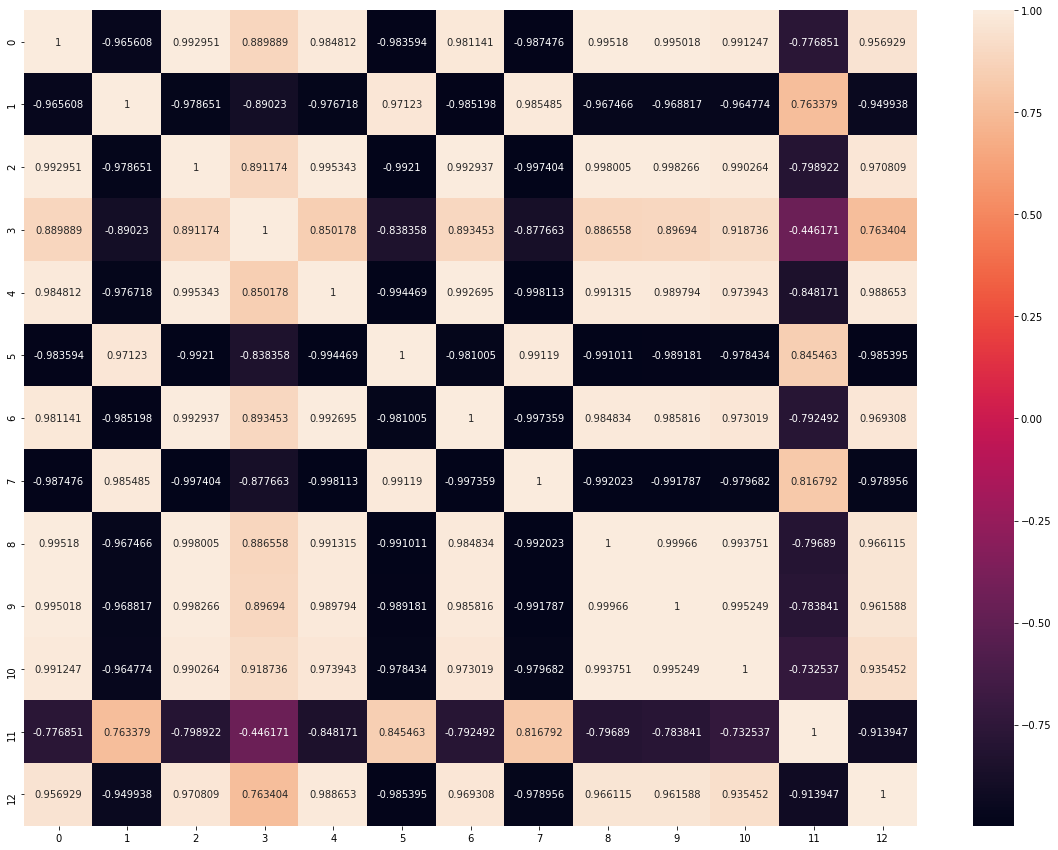

In [26]:
plt.subplots(figsize=(20,15))
sns.heatmap(cov_norm, annot=True, fmt='g')
# sns.heatmap(cov_matrix)
plt.show()